# Introduction

Google Trends gives an estimate of search volume. Let's explore if search popularity relates to other kinds of data:
<ul>
<li> TESLA Stock
<li> Bitcoin Stock
<li> Unemployment Benefits
</ul>

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

## Prepare Tesla data

In [2]:
# first load tesla data (google trends and stock)
t_trends = pd.read_csv('TESLA_SearchTrends.csv', skiprows=1, parse_dates=['Month'])
t_stock = pd.read_csv('TSLA.csv', parse_dates=['Date'])

t_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
# calculate the average between Open and Close
t_stock['Price'] = t_stock[['Open', 'Close']].mean(axis=1)

# drop columns not needed
t_stock.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

# stock data by day, needs to be grouped by month and get the avg. of high
t_stock['Date'] = t_stock['Date'].apply(lambda x: x.strftime('%Y-%m'))
t_stock = t_stock.groupby('Date').mean()

t_stock.head()

,Price
Date,
2010-06,4.625500
2010-07,3.963143
2010-08,3.905636
2010-09,4.151952
2010-10,4.143667


In [4]:
# join Google trends with stock data
t_trends['Month'] = t_trends['Month'].apply(lambda x: x.strftime('%Y-%m'))
t_trends.rename(columns={'Month': 'Date', 'TESLA: (Worldwide)': 'TESLA_Trends'}, inplace=True)

t_trends.head()
df_tesla = pd.merge(t_stock, t_trends, on='Date')

In [5]:
df_tesla.sample(10)

,Date,Price,TESLA_Trends
118,2020-04,132.889334,44
30,2012-12,6.827050,10
15,2011-09,4.924429,7
104,2019-02,61.492526,39
40,2013-10,35.075000,20
5,2010-11,5.762905,8
115,2020-01,105.170428,64
49,2014-07,44.723364,23
53,2014-11,49.308474,20
18,2011-12,6.000333,8


## Prepare Bitcoin data

In [6]:
# same as TESLA data

b_trends = pd.read_csv('Bitcoin_SearchTrends.csv', skiprows=1, parse_dates=['Month'])
b_stock = pd.read_csv('BTC-USD.csv', parse_dates=['Date'])

# calculate the average between Open and Close
b_stock['Price'] = b_stock[['Open', 'Close']].mean(axis=1)

# drop columns not needed
b_stock.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)

# stock data by day, needs to be grouped by month and get the avg. of high
b_stock['Date'] = b_stock['Date'].apply(lambda x: x.strftime('%Y-%m'))
b_stock = b_stock.groupby('Date').mean()

b_stock.head()

# join Google trends with stock data
b_trends['Month'] = b_trends['Month'].apply(lambda x: x.strftime('%Y-%m'))
b_trends.rename(columns={'Month': 'Date', 'Bitcoin: (Worldwide)': 'BTC_Trends'}, inplace=True)

df_btc = pd.merge(b_stock, b_trends, on='Date')

df_btc.sample(10)

,Date,Price,BTC_Trends
17,2016-02,403.356483,3
47,2018-08,6711.965450,13
5,2015-02,233.487751,3
57,2019-06,9377.690251,19
15,2015-12,423.541290,3
73,2020-10,11897.538627,13
37,2017-10,5325.720805,21
54,2019-03,3971.904750,8
31,2017-04,1202.144002,6
55,2019-04,5157.641374,12


## Prepare unemployment data

In [7]:
ue_trends = pd.read_csv('UnemploymentBenefits_SearchTrends.csv', skiprows=1, parse_dates=['Month'])
ue_rate = pd.read_csv('UNRATE.csv', parse_dates=['DATE'])

# join Google trends with rate
ue_trends.rename(columns={'Month': 'MONTH', 'Unemployment Benefits: (Worldwide)': 'UE_BENEFITS_WEB_SEARCH'}, inplace=True)
ue_rate.rename(columns={'DATE': 'MONTH'}, inplace=True)
        
df_ue = pd.merge(ue_trends, ue_rate, on='MONTH')
df_ue['MONTH'] = df_ue['MONTH'].apply(lambda x: x.strftime('%Y-%m'))

df_ue.sample(10)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
143,2015-12,6,5.0
5,2004-06,7,5.6
151,2016-08,4,4.9
80,2010-09,15,9.5
178,2018-11,4,3.8
175,2018-08,3,3.8
44,2007-09,8,4.7
50,2008-03,7,5.1
51,2008-04,9,5.0
187,2019-08,4,3.7


## now we have:

<ul>
    <li> df_tesla - combines Stock price and Google Search Trends (TESLA)
    <li> df_btc - combines Stock price and Google Search Trends (BITCOIN)
    <li> df_ue - combines rate and Google Search Trends (Unemployment)
</ul>



# Data Exploration

### Tesla

In [8]:
print(df_tesla.shape)
df_tesla.head()

(134, 3)


,Date,Price,TESLA_Trends
0,2010-06,4.625500,9
1,2010-07,3.963143,9
2,2010-08,3.905636,7
3,2010-09,4.151952,8
4,2010-10,4.143667,8


In [9]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TESLA_Trends.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TESLA_Trends.min()}')

Largest value for Tesla in Web Search: 100
Smallest value for Tesla in Web Search: 7


In [10]:
df_tesla.describe()

,Price,TESLA_Trends
count,134.000000,134.000000
mean,93.525775,31.940299
std,169.518104,22.173533
min,3.905636,7.000000
25%,7.921253,13.250000
50%,44.616386,27.000000
75%,63.474178,44.000000
max,827.977104,100.000000


### Unemployment Data

In [11]:
print(df_ue.shape)
df_ue.head()

(210, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,13,5.7
1,2004-02,8,5.6
2,2004-03,9,5.8
3,2004-04,10,5.6
4,2004-05,9,5.6


In [12]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_ue.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [13]:
print(df_btc.shape)
df_btc.head()

(83, 3)


,Date,Price,BTC_Trends
0,2014-09,409.918215,3
1,2014-10,364.948436,3
2,2014-11,365.475017,3
3,2014-12,342.171353,3
4,2015-01,250.291226,3


In [14]:
print(df_btc.shape)
df_btc.head()

(83, 3)


,Date,Price,BTC_Trends
0,2014-09,409.918215,3
1,2014-10,364.948436,3
2,2014-11,365.475017,3
3,2014-12,342.171353,3
4,2015-01,250.291226,3


In [15]:
print(f'largest BTC News Search {df_btc.BTC_Trends.max()}')

largest BTC News Search 8


# Data Cleaning

### Check for Missing Values

In [16]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for UE?: {df_ue.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc.isna().values.any()}')

Missing values for Tesla?: False
Missing values for UE?: False
Missing values for BTC Search?: False


# Data Visualisation

### Notebook Formatting & Style Helpers

In [17]:
# create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [18]:
# register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

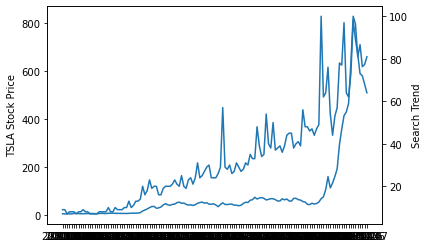

In [19]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')


ax1.plot(df_tesla.Date, df_tesla.Price)
ax2.plot(df_tesla.Date, df_tesla.TESLA_Trends)

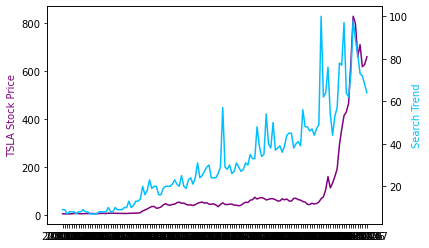

In [20]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='purple')
ax2.set_ylabel('Search Trend', color='deepskyblue') 

ax1.plot(df_tesla.Date, df_tesla.Price, color='purple')
ax2.plot(df_tesla.Date, df_tesla.TESLA_Trends, color='deepskyblue')

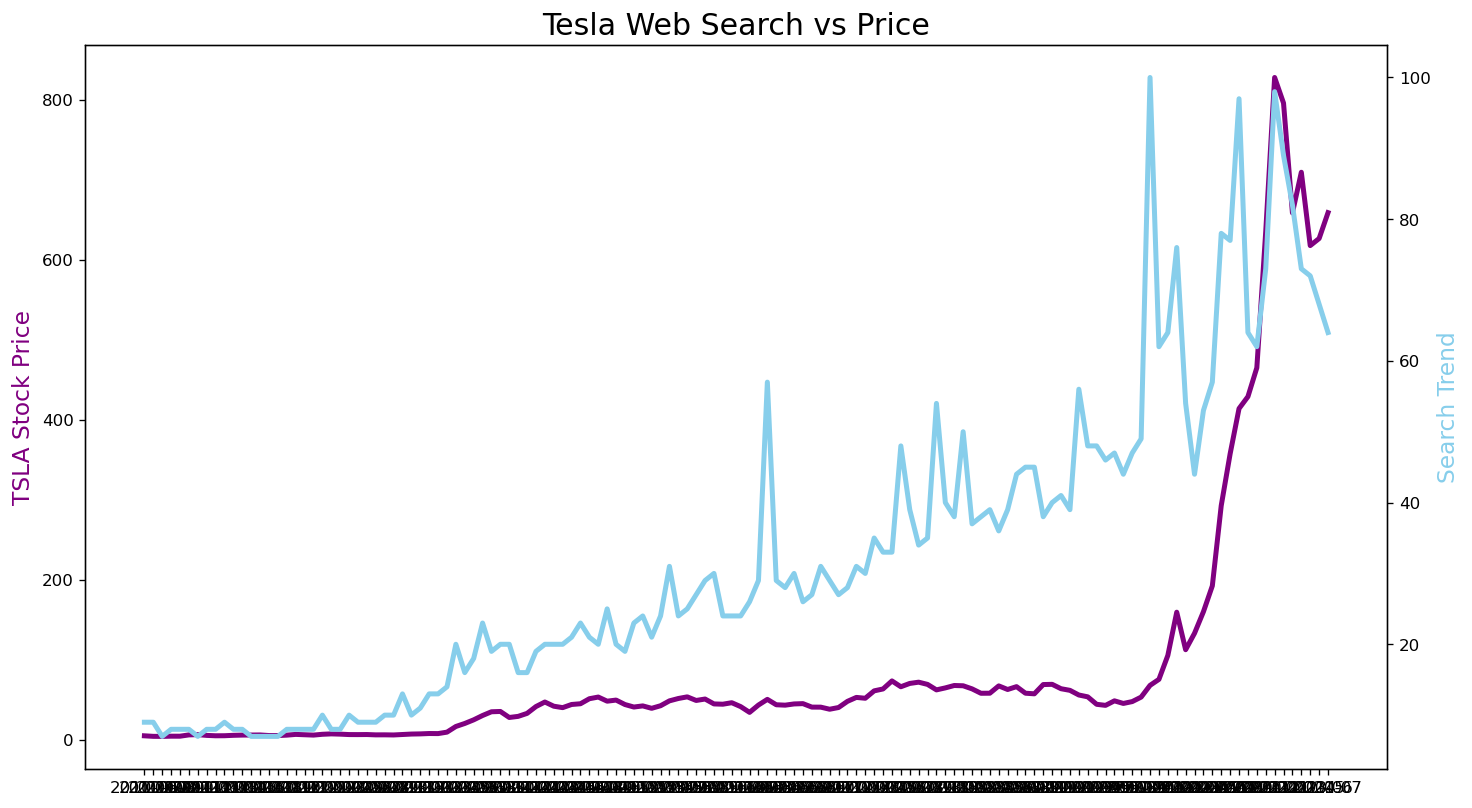

In [21]:
plt.figure(figsize=(14,8), dpi=120) # increases size and resolution
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

# increase fontsize and linewidth for larger charts
ax1.set_ylabel('TSLA Stock Price', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.plot(df_tesla.Date, df_tesla.Price, color='purple', linewidth=3)
ax2.plot(df_tesla.Date, df_tesla.TESLA_Trends, color='skyblue', linewidth=3)

# displays chart explicitly
plt.show()

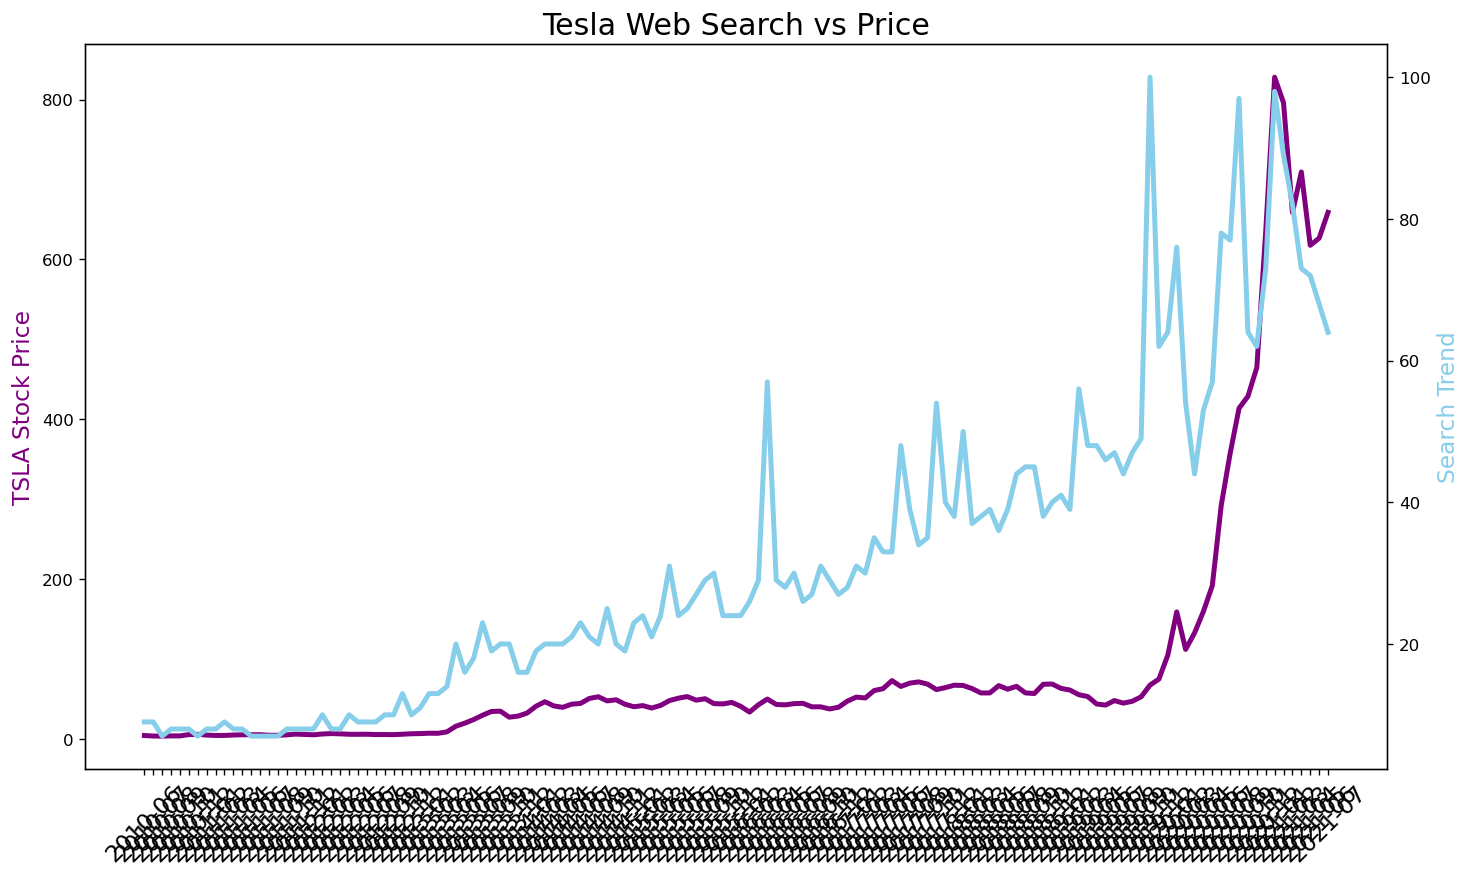

In [22]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

# increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.plot(df_tesla.Date, df_tesla.Price, color='purple', linewidth=3)
ax2.plot(df_tesla.Date, df_tesla.TESLA_Trends, color='skyblue', linewidth=3)

plt.show()

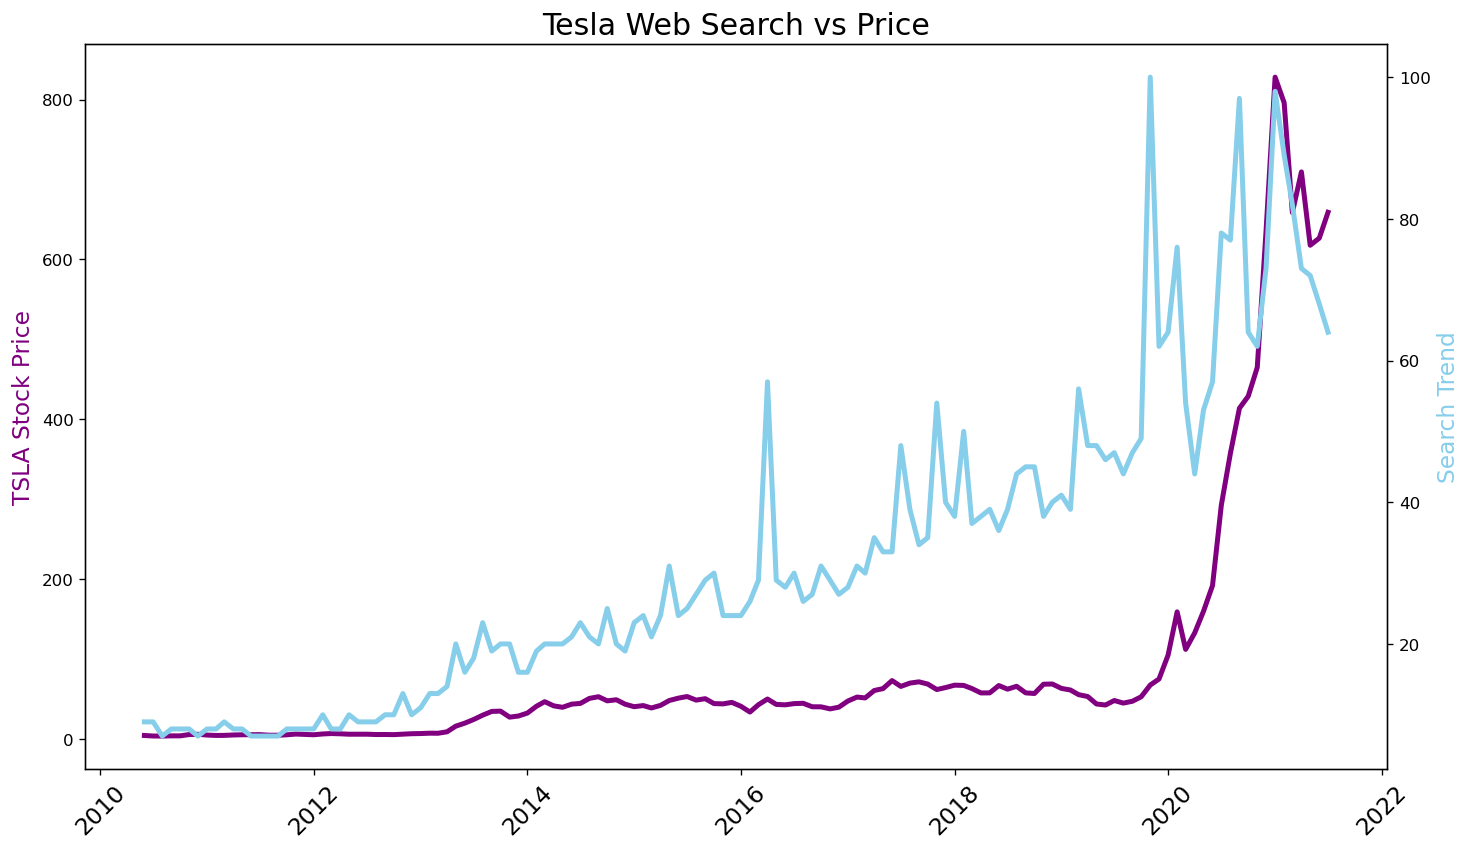

In [23]:
# show less ticks on x axis
x_values = [datetime.datetime.strptime(d,"%Y-%m").date() for d in df_tesla.Date]

plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_ylabel('TSLA Stock Price', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.plot(x_values, df_tesla.Price, color='purple', linewidth=3)
ax2.plot(x_values, df_tesla.TESLA_Trends, color='skyblue', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

In [24]:
df_btc.head(1)

,Date,Price,BTC_Trends
0,2014-09,409.918215,3


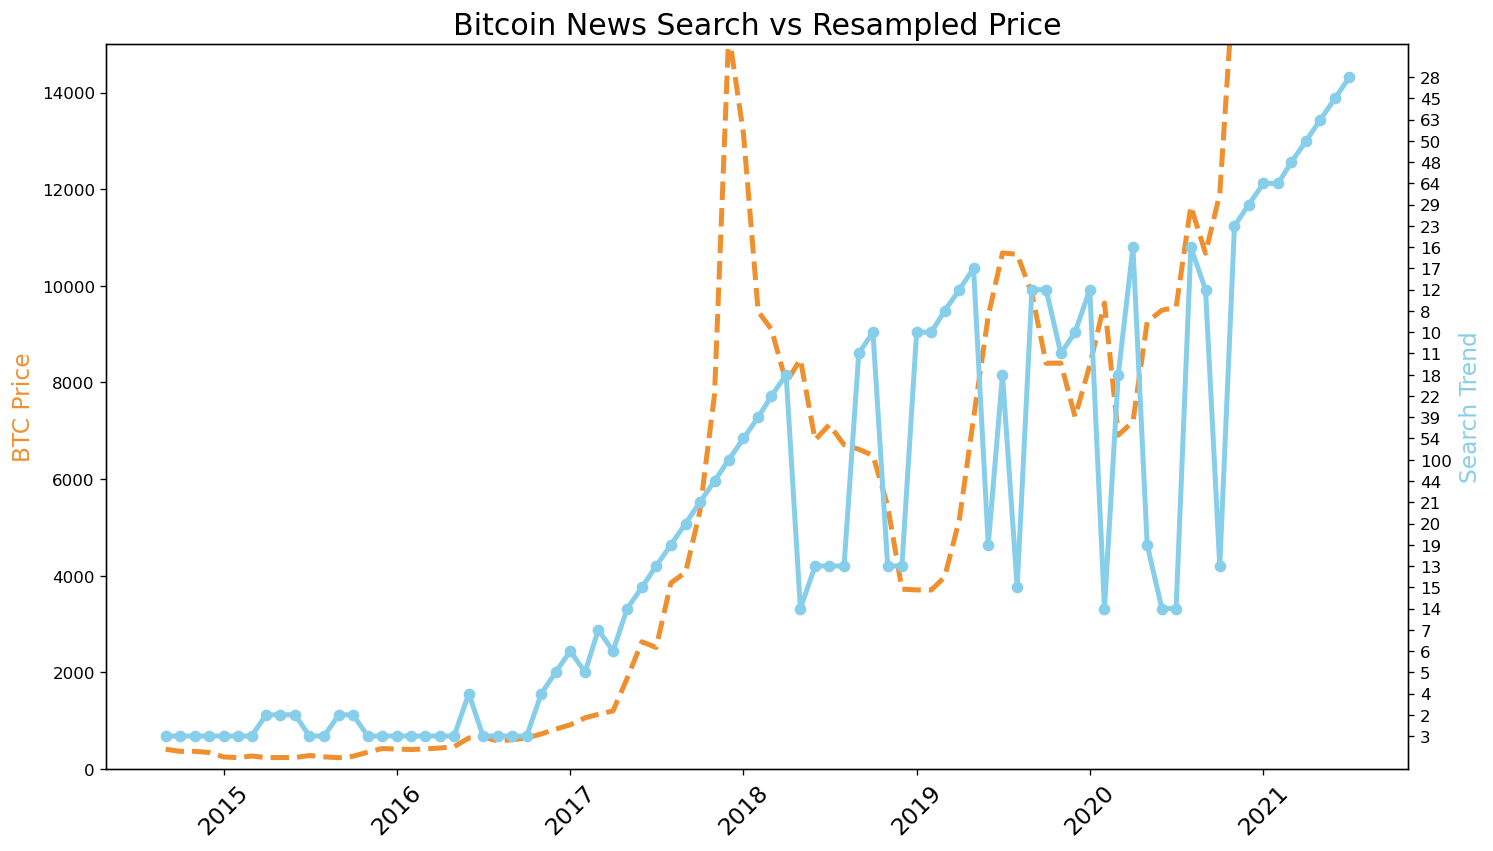

In [25]:
# show less ticks on x axis
x_values = [datetime.datetime.strptime(d,"%Y-%m").date() for d in df_btc.Date]

plt.figure(figsize=(14,8), dpi=120)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_ylim(bottom=0, top=15000)

# experiment with the linestyle and markers
ax1.plot(x_values, df_btc.Price, 
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(x_values, df_btc.BTC_Trends, 
         color='skyblue', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

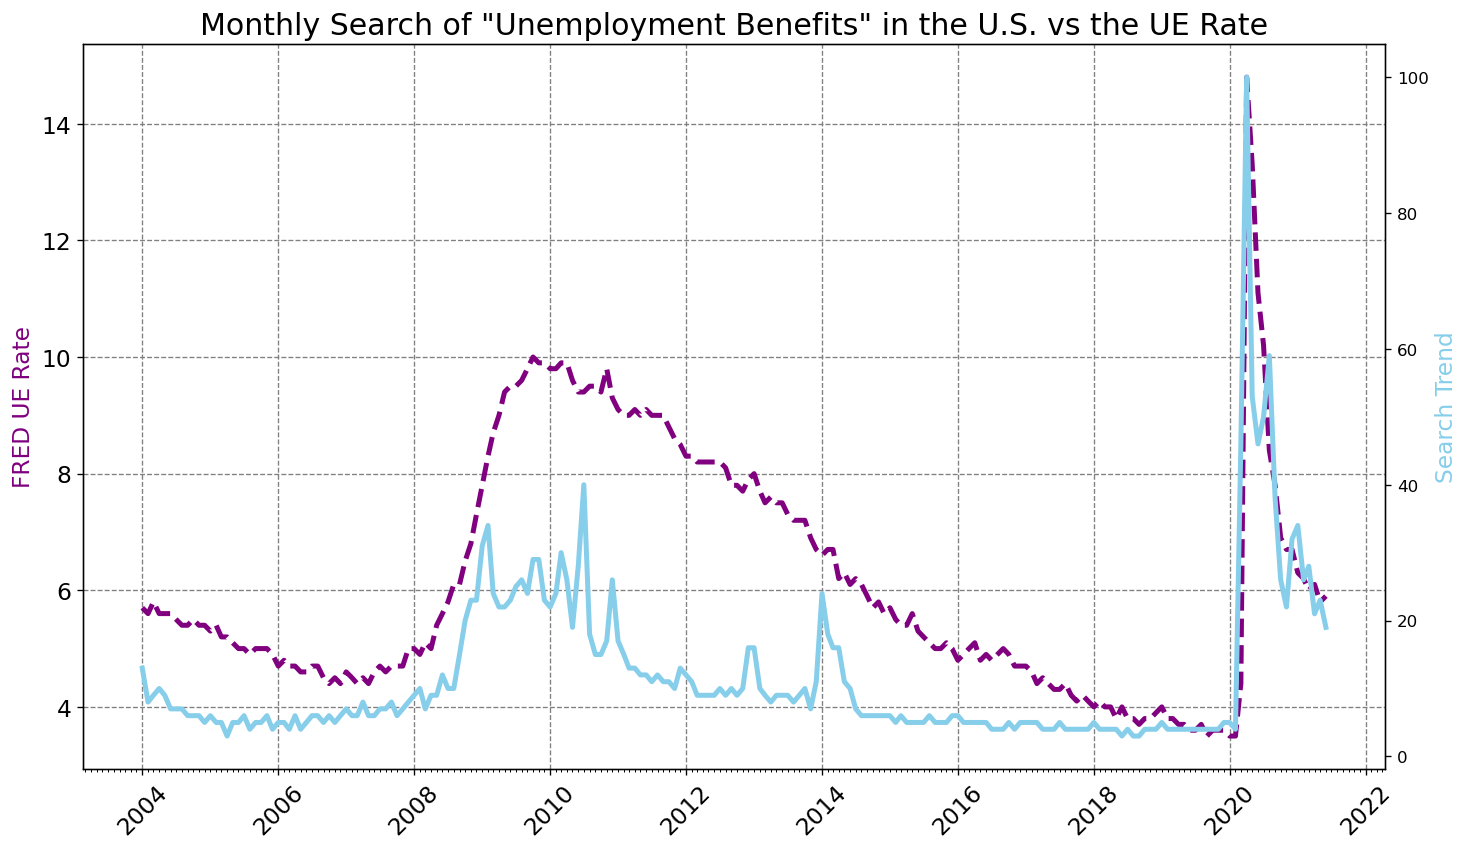

In [26]:
x_values = [datetime.datetime.strptime(d,"%Y-%m").date() for d in df_ue.MONTH]

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the UE Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED UE Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(x_values, df_ue.UNRATE, 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(x_values, df_ue.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)

plt.show()

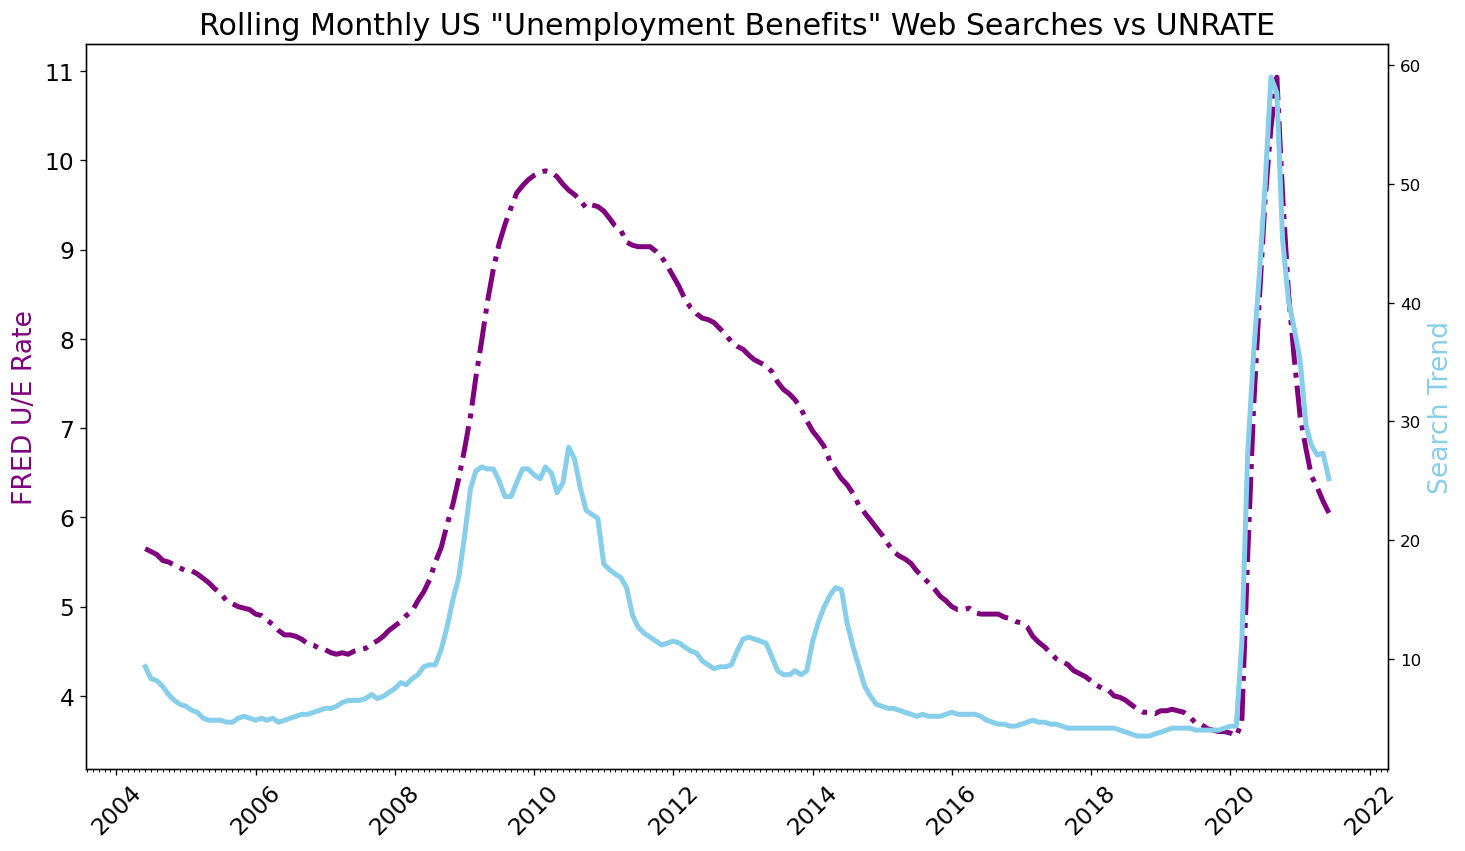

In [27]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)


# Calculate the rolling average over a 6 month window
roll_df = df_ue[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(x_values, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(x_values, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()